In [1]:
import numpy as np
import cvxpy as cp
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import solve
from scipy import stats

def is_pos_semidef(x):
    return np.all(np.linalg.eigvals(x) >= 0)

# функция для проверки положительной определенности матрицы
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

# функция для проверки симметричности матрицы
def is_symmetric(x):
    return (abs(x - np.transpose(x)) < 0.00000001).all()

# функция для проверки матрицы на квадаратичность
def is_squared(x):
    return x.shape[0] == x.shape[1]



# функция для перемножения симметричных матриц через жирную точку(tr(xy))
def bullet(x,y):
    return np.trace(x.dot(y))




# План
1. Задача линейного программирования LP
2. Матрицы
3. Полуопределенное программирование SDP
4. Двойственность SDP
5. Отличия SDP от LP
6. Метод внутренней точки
7. SDP в комбинаторной оптимизации(задача MAXCUT)

## 1. Задача линейного программирования LP



***
**Задача лин. прогр. в канон. форме:**
$$LP:~c\cdot x=\sum_{j=1}^{n}c_jx_j\rightarrow min$$
$$s.t.~a_ix=b_i,~i=1,...,m;~x\in R_+^n=\{x\in R^n|x\geq 0\}$$
***
Тут $R_+^n$ - замкнутый выпуклый конус.


***
**Опр.** K - замкнутый выпуклый конус, если:
- $x,w\in K\Rightarrow \alpha x+\beta w\in K~\forall\alpha,\beta\geq 0$
- K - замкнутое множество
***


***
**Двойственная задача LP:**
$$LD:~y\cdot b=\sum_{i=1}^{m}y_i b_i\rightarrow max$$
$$s.t.~\sum_{i=1}^m y_i a_i+s=c;~s\in R_+^n$$
***

Пусть $x$ - допустимое решение LP, $(y,S)$ - допустимое решение LD, тогда **разрыв двойственности**: 
$c\cdot x-y\cdot b=(c-\sum_{i=1}^m y_i a_i)\cdot x=s\cdot x\geq 0$, так как $x\geq 0, s\geq 0$. Однако из теории двойственности LP известно, что если задача LP выполнима и имеет ограниченный оптимум, то LP и LD достигают своих оптимумов без разрыва двойственности, т.е.<br>
$\exists $ $x^*$ и $(y^*,S^*)$-решения LP и LD, такие что $c\cdot x^*-\sum_{i=1}^m y_i^* b_i=s^*\cdot x^*=0$. 

## 2. Матрицы

***
**Опр.** X - матрица $n\times n$. X - полож. полуопределенная матрица(psd), если $v^TXv\geq 0~\forall v\in R^n$.
***
***
**Опр.** X - матрица $n\times n$. X - полож. определенная матрица(pd), если $v^TXv> 0~\forall v\in R^n$.
***

Пусть:
- $S^n$ - множество симметричных матриц $n\times n$
- $S_+^n$ - множество симметричных полож. полуопределенных матриц $n\times n$
- $S_{++}^n$ - множество симметричных полож. определенных матриц $n\times n$

Пусть $X,Y\in S^n$. Тогда:
- $X\succeq 0\Leftrightarrow X\in S^n_+$
- $X\succ 0\Leftrightarrow X\in S^n_{++}$

***
**Утв. 2.1.** $S_+^n$ - замкнутый выпуклый конус в $R^{n^2}$ размерности $\frac{n(n+1)}{2}$.<br>
*Док-во(см. стр. 3).*
***

Св-ва симметричных матриц:
- если $X\in S^n$, то $X=QDQ^T$, где Q - **ортогональная**, D - **диагональная**
- если $X=QDQ^T$, то столбцы Q - n ортогональных собственных векторов X, а элементы диагонали D - собственные числа X
- $X \succeq 0\Leftrightarrow X=QDQ^T$, где элементы диагонали D $\geq 0$
- $X \succ 0\Leftrightarrow X=QDQ^T$, где элементы диагонали D $> 0$
- $X \succeq 0$ и $X_{ii}=0\Rightarrow X_{ij}=X_{ji}=0~\forall j=1,...,n$
- пусть 
$\begin{pmatrix}
  P& v\\
  v^T& d
\end{pmatrix}$
, где $P\succ 0$, v - вектор, d - скаляр. Тогда: $M\succ 0\Leftrightarrow d-v^TP^{-1}v>0$

## 3. Полуопределенное программирование SDP

Рассмотрим $X\in S^n$.

***
**Опр.** $C(X)$ - линейная фукнция от X, если $C(X)=C\bullet X=\sum_{i=1}^n \sum_{j=1}^n C_{ij}X_{ij}$.
***
$\rightarrow$ Если X симметрична, то без потерь общности можно считать C тоже симметричной матрицей.

Теперь определим задачу полуопределенного программирования:
***
**Задача полуопр. прогр.:**
$$SDP:~C\bullet X\rightarrow min$$
$$s.t.~A_i\bullet X=b_i,~i=1,...,m;~X\succeq 0~(X\in S^n_+),$$
где $C, A_1, ..., A_m$ - симметричные матрицы, b - вектор размерности m.
***

Видно, что SDP очень похожа на LP. В действительности, LP - частный случай SDP(это показывается тривиальным образом).

## 4. Двойственность SDP

***
**Двойственная задача SDP:**
$$SDD:~\sum_{i=1}^m y_i b_i\rightarrow max$$
$$s.t.~\sum_{i=1}^m y_i A_i + S=C;~S\succeq 0$$
***

Следующее утверждение показывает, что **слабая двойственность** справедлива для задач SDP и SDD:
***
**Утв. 4.1.** При заданном допустимом решении X задачи SDP и (y,S) задачи SDD **разрыв двойственности**: $C\bullet X-\sum_{i=1}^m y_ib_i=S\bullet X\geq 0$. Если $C\bullet X-\sum_{i=1}^m y_ib_i=0$, то X и (y,S) - оптимумы SDP и SDD соответственно, причем $S\bullet X=0$.<br>
*Док-во(см. стр. 10).*
***

В отличие от случая LP, в SDP для выполнения **сильной двойственности** необходимо выполнение определенного условия регулярности, называемого **условием Слейтера**:
***
**Теорема 4.1.** Пусть $z_P^*$ и $z_D^*$ - оптимальные значения целевых функций SDP и SDD соотвественно. Пусть $\exists$ допустимое решение $\hat{X}$ для SDP, $\hat{X}\succ 0$, и что $\exists$ допустимое решение $(\hat{y},\hat{S})$ для SDD, $\hat{S}\succ 0$. Тогда SDP и SDD достигают своих оптимальных значений, причем $z_P^*=z_D^*$.<br>
*Док-во(не приводим).*
***

## 5. Отличия SDP от LP

- может существовать конечный или бесконечный разрыв двойственности. SDP и SDD могут достигать или не достигать своих оптимумов(см. теорему 4.1)
- не существует конечного алгоритма решения SDP
- при рациональных входных данных SDP в допустимой области может не быть рациональных решений
- при рациональных входных данных размера L(двоичного кодирования), нормы любых возможных и/или оптимальных решений могут превышать $2^{2^L}$(или быть меньше $2^{-2^L}$)


## 6. Метод внутренней точки

В основе **метода внутренней точки** лежит барьерная функция, которая создает отталкивающую силу от границы допустимой области. Для SDP нужна барьерная функция, значение которой $\rightarrow +\infty$ по мере приближения точек X к границе полуопределенного конуса $S_+^n$.

***
Пусть $X\in S_+^n$. Тогда X имеет n собственных значений: $\lambda_1(X),...,\lambda_n(X)$ (с учетом кратности). Охарактеризуем внутренную часть $S_+^n$ следующим образом:
$$int~S_+^n=\{X\in S^n|\lambda_1(X)>0,...,\lambda_n(X)>0\}$$
Тогда естественная **барьерная функция** для отталкивания X от границы $S_+^n$ имеет вид:
$$-\sum_{j=1}^n \ln(\lambda_j(X))=-\ln(\prod_{j=1}^n\lambda_j(X))=-\ln(det(X))$$
***

Рассмотрим следующую задачу логарифмического барьера для SDP, параметризованную положительным параметром $\Theta$:
***
**Задача лог. барьера для SDP:**
$$BSDP(\Theta):~C\bullet X-\Theta\ln(det(X))\rightarrow min$$
$$s.t.~A_i\bullet X=b_i,~i=1,...,m;~X\succ 0$$
***

Пусть $f_{\Theta}(X)$ - целевая функция $BSDP(\Theta)$, т.е.:
$$f_{\Theta}(X)=C\bullet X-\Theta\ln(det(X)).$$
Тогда:
$$\nabla f_{\Theta}(X)=C-\Theta X^{-1}.$$
***
Значит, **условия Каруша-Куна-Таккера** для $BSDP(\Theta)$:
$$
\begin{equation*}
\begin{cases}
A_i\bullet X=b_i,~i=1,...,m\\
X\succ 0\\
C-\Theta X^{-1}=\sum_{i=1}^m y_iA_i
\end{cases}
\end{equation*}
$$
***

Так как X симметрична, то ее можно представить как $X=LL^T$(разложение Холецкого). Затем определим: 
$$S=\Theta X^{-1}=\Theta (L^T)^{-1}L^{-1}\Rightarrow \frac{1}{\Theta}L^TSL=I.$$
***
Теперь можно переписать **условия Каруша-Куна-Таккера** для $BSDP(\Theta)$:
$$
\begin{equation*}
\begin{cases}
A_i\bullet X=b_i,~i=1,...,m\\
X\succ 0,~X=LL^T\\
\sum_{i=1}^m y_iA_i+S=C\\
I - \frac{1}{\Theta}L^TSL=0
\end{cases}
\end{equation*}
$$
***
Из этой системы следует, что если (X,y,S) - ее решение, то X допустимо для SDP, (y,S) допустимо для SDD, и **разрыв двойственности** будет равен:
$$S\bullet X=\sum_{i=1}^n\sum_{j=1}^n S_{ij}X_{ij}=\sum_{j=1}^n(SX)_{jj}=\sum_{j=1}^n\Theta=n\Theta.$$
Это означает, что надо пробовать решать $BSDP(\Theta)$ при разных $\Theta$, т.ч. $\Theta\rightarrow 0$.

Однако обычно мы не можем решить точно решить данную систему. Поэтому мы определим $\beta$-приближенное решение условий Каруша-Куна-Таккера. Будем использовать следующую норму:
***
**Опр.** Норма Фробениуса: $||M||=\sqrt{M\bullet M}=\sqrt{\sum_{i=1}^n\sum_{j=1}^n M_{ij}^2}$.
***


Свойства нормы Фробениуса:
- $||M||=\sqrt{\sum_{j=1}^n (\lambda_j(M))^2}$, где $\lambda_1(M),...,\lambda_n(M)$ - собственные значения матрицы M
- если $\lambda$ - собственное значение матрицы M, то $|\lambda|\leq ||M||$
- $|tr(M)|\leq \sqrt{n}||M||$
- если $||M||<1$, то $I+M\succ 0$
- если $A,B\in S^n$, то $||AB||\leq ||A||\cdot ||B||$

***
Тогда $\beta$-**приближенное решение** $BSDP(\Theta)$ определяется как $\forall$ решение $(X,y,S)$ из системы:
$$
\begin{equation*}
\begin{cases}
A_i\bullet X=b_i,~i=1,...,m\\
X\succ 0,~X=LL^T\\
\sum_{i=1}^m y_iA_i+S=C\\
||I - \frac{1}{\Theta}L^TSL||\leq \beta
\end{cases}
\end{equation*}
$$
***

***
**Утв. 6.1.** Если $(\overline{X},\overline{y},\overline{S})$ - $\beta$-**приближенное решение** $BSDP(\Theta)$ и $\beta < 1$, то $\overline{X}$ допустимо для SDP, $(\overline{y},\overline{S})$ допустимо для SDD, и разрыв двойственности:
$$n\Theta(1-\beta)\leq C\bullet X - \sum_{i=1}^n y_ib_i=\overline{X}\bullet\overline{S}\leq n\Theta(1+\beta).$$
*Док-во(см. стр. 29).*
***

### 6.1. Алгоритм

Основываясь на анализе выше, был предложен следующий алгоритм:<br>
<img src = "photos/1.png" width = "50%" alt = "скриншот" align = center />

Нерешенные вопросы, связанные с этим алгоритмом:
- как установить параметр убывания $\alpha$
- вывод шага Ньютона D' и множителей y'
- является ли элементы последовательности $(X^k,y^k,S^k)$ $\beta$-приближенными решениями $BSDP(\Theta^k)$
- как запустить метод на первой итерации

### 6.2. Шаг Ньютона

Пусть $\overline{X}$ - допустимое решение $BSDP(\Theta)$ (обозначили целевую функцию $BSDP(\Theta)$ за $f_{\Theta}(X)=C\bullet X-\Theta\ln(det(X))$; $\nabla f_{\Theta}(X)=C-\Theta X^{-1}$). 
***
Тогда **квадратичная аппроксимация** $BSDP(\Theta)$ при $X=\overline{X}$ определяется как:
$$(C-\Theta \overline{X}^{-1})\bullet  D+\frac{1}{2}\Theta\overline{X}^{-1}D\bullet\overline{X}^{-1}D\rightarrow min_{D}$$
$$A_i\bullet D=0,~i=1,..,m$$
***
Решение этой задачи и даст ньютоновское направление шага.

***
**Условия Каруша-Куна-Таккера** для этой задачи:
$$C-\Theta \overline{X}^{-1}+\Theta\overline{X}^{-1}D\overline{X}^{-1}=\sum_{i=1}^n y_iA_i$$
$$A_i\bullet D=0$$
Эта система называется **нормальными уравнениями**
***

Пусть D' и y' - решение нормальных уравнений(D' должна быть симметричной).<br>
Тогда: $X'=\overline{X}+D'$ (ньютоновский шаг); $y'=y$; $S'=C-\sum_{i=1}^m y_i'A_i=\Theta \overline{X}^{-1}-\Theta\overline{X}^{-1}D'\overline{X}^{-1}$ (новые переменные).<br>
Есть следующая теорема, которая демонстрирует квадратичную сходимость метода Ньютона для данной задачи:
***
**Теорема 6.1.** Пусть $(\overline{X},\overline{y},\overline{S})$ - $\beta$-приближенное решение $BSDP(\Theta)$ и $\beta<1$, пусть (D',y') - решение нормальных уравнений, и пусть $X'=\overline{X}+D'$ и $S'=\Theta \overline{X}^{-1}-\Theta\overline{X}^{-1}D'\overline{X}^{-1}$. Тогда $(X',y',S')$ - $\beta^2$-приближенное решение $BSDP(\Theta)$.<br>
*Док-во(см. стр. 29).*
***

### 6.3. Анализ сложности

***
**Теорема 6.2 (о релаксации).** Пусть $(\overline{X},\overline{y},\overline{S})$ - $\beta$-приближенное решение $BSDP(\Theta)$ и $\beta<1$. Пусть $\alpha=1-\frac{\sqrt{\beta}-\beta}{\sqrt{\beta}+\sqrt{n}}$ и $\Theta'=\alpha\Theta$. Тогда $(\overline{X},\overline{y},\overline{S})$ - это $\sqrt{\beta}$-приближенное решение для $BSDP(\Theta')$.<br>
*Док-во(см. стр. 36).*
***
***
**Теорема 6.3 (о сходимости).** Пусть $(X^0,y^0,S^0)$ - $\beta$-приближенное решение $BSDP(\Theta^0)$ и $\beta<1$. Тогда для $\forall k=1,2,3,...$ : $(X^k,y^k,S^k)$ - $\beta$-приближенное решение $BSDP(\Theta^k)$.<br>
*Док-во(см. стр. 37).*
***
***
**Теорема 6.4 (о сложности).** Пусть $(X^0,y^0,S^0)$ - $\beta=\frac{1}{4}$-приближенное решение $BSDP(\Theta^0)$. Чтобы получить допустимые решения $(X^k,y^k,S^k)$ исходной и двойственной задач с рызрывом двойственности не более $\varepsilon$, необходимо запустить алгоритм не более 
$k=\lceil 6\sqrt{n} \ln (\frac{1.25}{0.75}\frac{X^0\bullet S^0}{\varepsilon})\rceil$ итераций.<br>
*Док-во(см. стр. 39).*
***

### 6.4. Как начать метод с выполнимой точки

Алгоритм и его производительность зависит от наличия начальной точки $(X^0,y^0,S^0)$, которая является $\beta$-приближенным решением задачи $BSDP(\Theta^0)$. Сейчас мы покажем, как получить такую точку, имея положительно определенное допустимое решение $X^0$ задачи SDP.<br>
Предполагаем, что нам заданы $\Theta=\Theta^0$ - значение параметра барьера, $X=X^0$, которое выполнимо для $BSDP(\Theta^0)$, т.е. $A_i\bullet X^0=b_i,~i=1,...,m$ и $X^0\succ 0$. Попытаемся приблизительно решить $BSDP(\Theta^0)$, начиная с $X=X^0$, испоьзуя шаг Ньютона на каждой итерации. Тогда формальное описание алгоритма:<br>
<img src = "photos/2.png" width = "50%" alt = "скриншот" align = center />
<img src = "photos/3.png" width = "49%" alt = "скриншот" align = center />

Следующие 2 утверждения доказывают правильность 3 Шага данного алгоритма:
***
**Утв. 6.2.** Пусть $(D',y')$ - решение нормальных уравнений (10) для точки $\overline{X}$ для заданного значения $\Theta^0$ параметра барьера и пусть $||\overline{L}^{-1}D'(\overline{L}^{-1})^T||\leq \frac{1}{4}$. Тогда $\overline{X}$ - $\frac{1}{4}$-приближенное решение $BSDP(\Theta^0)$.<br>
*Док-во(см. стр. 41).*
***
***
**Утв. 6.3.** Пусть $\overline{X}$ удовлетворяет $A_i\bullet \overline{X}=b_i,~i=1,...,m$ и $\overline{X}\succ 0$. Пусть $(D',y')$ - решение нормальных уравнений (10) для точки $\overline{X}$ для заданного значения $\Theta^0$ параметра барьера и пусть $||\overline{L}^{-1}D'(\overline{L}^{-1})^T||\leq \frac{1}{4}$. Тогда:
$$\forall\gamma\in [0,1):~f_{\Theta^0}(\overline{X}+\frac{\gamma}{||\overline{L}^{-1}D'(\overline{L}^{-1})^T||}D')\leq f_{\Theta^0}(\overline{X})+\Theta^0(-\gamma ||\overline{L}^{-1}D'(\overline{L}^{-1})^T||+\frac{\gamma^2}{2(1-\gamma)}).$$
*Док-во(см. стр. 42).*
***

### 6.5. Реализация алгоритма нахождения начальной строго-допустимой точки

Напишем функцию $feasible\_point(C, A_1,...,A_m, b, X^0, \Theta^0 = 1)$, которая принимает на вход параметры задачи $(C,A_1,...,A_m,b)$, допустимую точку $X^0$ и параметр барьера $\Theta^0$, а выдает начальную строго-допустимую точку $(\overline{X}, \overline{y}, \overline{S})$ и параметр барьера $\Theta^0$:

In [2]:
def norm_equations(c,a_array, b, x, theta):
    # определям размеры матрицы
    n = len(x)
    m = len(a_array)
    
    
    
    
    # для решения системы нормальных уравнений надо определить матрицу matrix и столбец своб. членов column
    matrix = np.zeros((n**2  + m, n** 2 + m))
    
    # создаем столбец свободных членов, соответствующий элементам матрицы theta*X-XCX, лежащим на и выше диагонали
    p = theta * x - x.dot(c).dot(x)
    column = [0 for i in range(n**2 + m)]
    counter = 0
    for i in range(n):
        for j in range(n):
            if i <= j:
                column[counter] = p[i][j]
                counter += 1
                
    # создаем матрицу для умножения на искомый вектор(опять в рассмотрение берем элементы, лежащие на и выше
    # диагонали)
    
    counter = 0
    
    e = np.eye(n)
    for i in range(n):
        temp = np.zeros(n**2)
        for j in range(n):
            temp[n * j] = theta * e[i][j]
        for k in range(n):
            if i <= k:
                matrix[counter, :n**2] = np.roll(temp, k)
                counter += 1
    
       
    # заполняем таблицу ограничениями -y_i * (X A_i X)
    xax_array = []
    for a in a_array:
        xax = -x.dot(a).dot(x)
        temp = []
        for i in range(n):
            for j in range(n):
                if i <= j:
                    temp.append(xax[i][j])
        xax_array.append(temp)
    
    for i in range(m):
        matrix[:counter, n**2 + i] = xax_array[i]
                
    # заполняем таблицу ограничениями bullet(A_i, D)
    for i in range(m):
        matrix[counter, :n**2] = np.ravel(a_array[i])  
        counter += 1
            
    
        
    # заполняем таблицу ограничениями на симметричность матрицы D
    for i in range(n):
        for j in range(n):
            if i < j:
                temp = np.zeros((n, n))
                temp[i][j] = 1
                temp[j][i] = -1
                matrix[counter][:len(x) ** 2] = np.ravel(temp)
                counter += 1
                
    
    # решение представляет собой вектор (d_11,...,d_nn,y_1,...,y_m)
    solution = solve(matrix, column)
    
    # искомая матрица D
    d = np.array([[solution[len(x) * i + j] for i in range(len(x))]for j in range(len(x))])
    
    # искомые коэффициенты y
    y = solution[len(x) ** 2:].copy()
    
    return d, y


In [3]:



def norm_equations1(c,a_array, b, x, theta):
    # определям размеры матрицы
    n = len(x)
    m = len(a_array)
    
    
    
    # ищем обратную к X матрицу
    x_inv = np.linalg.inv(x)
    
    # для решения системы нормальных уравнений надо определить матрицу matrix и столбец своб. членов column
    matrix = np.zeros((n**2  + m, n** 2 + m))
    
    # создаем столбец свободных членов, соответствующий элементам матрицы -C*X + E, лежащим на и выше диагонали
    p = -c.dot(x) + theta * np.eye(n)
    column = [0 for i in range(n**2 + m)]
    counter = 0
    for i in range(n):
        for j in range(n):
            if i <= j:
                column[counter] = p[i][j]
                counter += 1
                
    # создаем матрицу для умножения на искомый вектор(опять в рассмотрение берем элементы, лежащие на и выше
    # диагонали)
    counter = 0
    for i in range(n):
        temp = np.zeros(n**2)
        for j in range(n):
            temp[n * j] = theta * x_inv[i][j]
        for k in range(n):
            if i <= k:
                matrix[counter, :n**2] = np.roll(temp, k)
                counter += 1
    
       
    # заполняем таблицу ограничениями -y_i * (A_i*X)
    ax_array = []
    for a in a_array:
        ax = -a.dot(x)
        temp = []
        for i in range(n):
            for j in range(n):
                if i <= j:
                    temp.append(ax[i][j])
        ax_array.append(temp)
    
    for i in range(m):
        matrix[:counter, n**2 + i] = ax_array[i]
                
    # заполняем таблицу ограничениями bullet(A_i, D)
    for i in range(m):
        matrix[counter, :n**2] = np.ravel(a_array[i])  
        counter += 1
            
    
        
    # заполняем таблицу ограничениями на симметричность матрицы D
    for i in range(n):
        for j in range(n):
            if i < j:
                temp = np.zeros((n, n))
                temp[i][j] = 1
                temp[j][i] = -1
                matrix[counter][:len(x) ** 2] = np.ravel(temp)
                counter += 1
                
    
    # решение представляет собой вектор (d_11,...,d_nn,y_1,...,y_m)
    solution = solve(matrix, column)
    
    # искомая матрица D
    d = np.array([[solution[len(x) * i + j] for i in range(len(x))]for j in range(len(x))])
    
    # искомые коэффициенты y
    y = solution[len(x) ** 2:].copy()
    
    return d, y
    
   



In [4]:


# функция для нахождения начальной строго-допустимой точки
def feasible_point(c, a_array, b, x_0, theta_0 = 1): 
    ax_0 = np.array([bullet(a, x_0) for a in a_array])
    
    # проверяем корректность входных данных(дописать проверку на одинаковые размеры матриц)
    a_squared = [is_squared(a) for a in a_array]
    if a_squared.count(0) != 0 or is_squared(c) == 0 or is_squared(x_0) == 0:
        print('На вход поданы не квадратные матрицы')
        return 1, 1, 1, 1, 1
    if len(a_array) != len(b):
        print('Некорректные ограничения')
        return 1, 1, 1, 1, 1
    if (abs(ax_0 - b) > 0.00000001).any() or is_pos_def(x_0) == 0:
        print('X_0 не удовлетворяет условиям SDP')
        return 1, 1, 1, 1, 1
    a_symmetric = [is_symmetric(a) for a in a_array]
    if a_symmetric.count(0) != 0 or is_symmetric(c) == 0 or is_symmetric(x_0) == 0:
        print('На вход поданы несимметричные матрицы')
        return 1, 1, 1, 1, 1
    
    
    # задаем начальное значение
    x = x_0.copy()
    
    
    while True:
        
        # ищем разложение Холецкого
        l = np.linalg.cholesky(x)
    
        # ищем обратную к X матрицу
        x_inv = np.linalg.inv(x)
    
    
        # решаем нормальные уравнения
        d, y = norm_equations(c,a_array, b, x, theta_0)
        
        # проверяем условие остановы
        norm = np.linalg.norm(np.linalg.inv(l).dot(d).dot(np.linalg.inv(l).transpose()), ord = 'fro')
        if norm <= 0.25:
            s = c.copy()
            for i in range(len(a_array)):
                s = s - y[i] * a_array[i]
            return x, y, s, theta_0, norm
        else:
            x = x + (0.2 / norm) * d
    

### 6.6. Реализация алгоритма нахождения оптимума с заданным разрывом двойственности


Напишем функцию $sdp(C, A_1,...,A_m, b, X^0, y^0, S^0, \Theta^0 = 1, \varepsilon, \beta = \frac{1}{4})$, которая принимает на вход параметры задачи $(C,A_1,...,A_m,b)$, начальную строго-допустимую точку $(X^0,y^0,S^0)$, параметр барьера $\Theta^0$, требуемуюю точность для нахождения оптимума и коэффициент $\beta=\frac{1}{4}$ ($(X^0,y^0,S^0)$ является $\beta=\frac{1}{4}$-приближенным решением $BSDP(\Theta^0)$ после выполнения функции feasible\_point), а выдает оптимум задачи c точностью $\varepsilon$ (она не может быть меньше $\beta$):

In [5]:


# функция для нахождения оптимума с заданной точностью epsilon(epsilon не может быть меньше beta!!!)
def sdp(c, a_array, b, x_0, y_0, s_0, theta_0, beta, epsilon):
    ax_0 = np.array([bullet(a, x_0) for a in a_array])
    
    # проверяем корректность входных данных(дописать проверку на одинаковые размеры матриц)
    a_squared = [is_squared(a) for a in a_array]
    if a_squared.count(0) != 0 or is_squared(c) == 0 or is_squared(x_0) == 0 or is_squared(s_0) == 0:
        print('На вход поданы не квадратные матрицы')
        return 1,1,1
    if len(a_array) != len(b) or len(a_array) != len(y_0) or len(b) != len(y_0):
        print('Некорректные ограничения')
        return 1,1,1
    if (abs(ax_0 - b) > 0.00000001).any() or is_pos_def(x_0) == 0:
        print('X_0 не удовлетворяет условиям SDP')
        return 1,1,1
    a_symmetric = [is_symmetric(a) for a in a_array]
    if a_symmetric.count(0) != 0 or is_symmetric(c) == 0 or is_symmetric(x_0) == 0 or is_symmetric(s_0) == 0:
        print('На вход поданы несимметричные матрицы')
        return 1,1,1
    
    
    # задаем начальные значения
    x = x_0.copy()
    y = y_0.copy()
    s = s_0.copy()
    theta = theta_0
    
    # параметр сокращения для theta
    alpha = 1 - (np.sqrt(beta) - beta) / (np.sqrt(beta) + np.sqrt(len(x)))
    
    
    while True:
        
        
        # сокращение theta
        theta = alpha * theta
        
        # ищем обратную к X матрицу
        x_inv = np.linalg.inv(x)
        
        # решаем нормальные уравнения
        d, y = norm_equations(c,a_array, b, x, theta)
        
        
        
        
        # обновление значения X
        x = x + d
        # обновление значения S
        s = c.copy()
        for i in range(len(a_array)):
            s = s - y[i] * a_array[i]
        
        if bullet(x,s) <= epsilon:
            return x, y, s
        
    

### 6.7. Пример решения задачи SDP

На легком примере покажем, как работают написанные нами функции:

In [6]:
c = np.array([[2,0,1],[0,3,0],[1,0,4]])
a_array = np.array([[[1,0,0],[0,1,0],[0,0,1]],[[3,1,0],[1,4,2],[0,2,2]]])
x_0 = np.array([[1,0,0],[0,2,0],[0,0,3]])
b = np.array([6,17])

print('1) Начальная допустимая точка:\n', x_0)
print('Значение целевой функции: ', bullet(c, x_0))
print('Ограничения: ', bullet(a_array[0], x_0),', ', bullet(a_array[1], x_0))

x_0, y_0, s_0, theta_0, beta = feasible_point(c, a_array, b, x_0, theta_0 = 1)
print('2) Начальная строго-допустимая точка:\n', x_0, '\n', y_0, '\n', s_0)
print('Значение целевой функции: ', bullet(c, x_0))
print('Ограничения: ', bullet(a_array[0], x_0),', ', bullet(a_array[1], x_0))
print('Разрыв двойственности: ', bullet(x_0, s_0))
print('Симметричность x_0: ', is_symmetric(x_0))
print('Положительная определенность x_0: ', is_pos_def(x_0))

x, y, s = sdp(c, a_array, b, x_0, y_0, s_0, theta_0, beta, epsilon = 0.001)
print('3) Точка с разрывом двойственности не больше 0.1:\n', x)
print('Значение целевой функции: ', bullet(c, x))
print('Ограничения: ', bullet(a_array[0], x),', ', bullet(a_array[1], x))
print('Разрыв двойственности: ', bullet(x, s))
print('Симметричность x: ', is_symmetric(x))
print('Положительная определенность x: ', is_pos_def(x))

1) Начальная допустимая точка:
 [[1 0 0]
 [0 2 0]
 [0 0 3]]
Значение целевой функции:  20
Ограничения:  6 ,  17
2) Начальная строго-допустимая точка:
 [[ 4.23847646 -0.08268541 -1.74324248]
 [-0.08268541  0.5953552  -0.06595401]
 [-1.74324248 -0.06595401  1.16616833]] 
 [ 1.98753676 -0.21057727] 
 [[0.64419506 0.21057727 1.        ]
 [0.21057727 1.85477234 0.42115455]
 [1.         0.42115455 2.43361779]]
Значение целевой функции:  11.441206910728408
Ограничения:  5.999999999999999 ,  16.999999999999996
Разрыв двойственности:  3.0958000084662887
Симметричность x_0:  True
Положительная определенность x_0:  True
3) Точка с разрывом двойственности не больше 0.1:
 [[ 5.01367008e+00 -6.99977962e-02 -2.22225267e+00]
 [-6.99977962e-02  1.18720054e-03  3.09877785e-02]
 [-2.22225267e+00  3.09877785e-02  9.85142722e-01]]
Значение целевой функции:  9.526967300481363
Ограничения:  5.9999999999999964 ,  17.0
Разрыв двойственности:  0.0009957408049245196
Симметричность x:  True
Положительная определе

## 7. Задача о максимальном разрезе графа MAXCUT

Пусть $G$ - неориентированный граф с вершинами $N=\{1,...,n\}$ и набор ребер $E$. Пусть $w_{ij}=w_{ji}$ - вес ребра $(i,j)\in E$. Задача **MAXCUT** состоит в том, чтобы определить подмножество  $S$ вершин $N$, для которого сумма весов ребер, идущих из $S$ в его дополнение $\overline{S}$, максимальна.

***
Опишем задачу **MAXCUT** формально.<br>
Пусть $x_j=1$ для $j\in S$, $x_j=-1$ для $j\in \overline{S}$. Тогда:
$$MAXCUT:~\frac{1}{4}\sum_{i=1}^n\sum_{j=1}^n w_{ij}(1-x_ix_j) \rightarrow max_x$$
$$s.t.~x_j\in\{-1,1\},~j=1,...,n$$
***


Задача **MAXCUT** является NP-трудной, и до определенного момента(появления теории SDP) существовал только $\frac{1}{2}$-аппроксимационный вероятностный алгоритм.

### 7.0. Как брать информацию о графах для данной задачи

В папке **/data** будут храниться файлы *.txt*, в которых лежат данные об исследуемых графах(в строке через пробел написано число вершин и число ребер, в последующих строчках хранятся ребра в формате (i j) - ребро между i-ой и j-ой вершинами). Все алгоритмы, написанные далее, способны решать данную задачу для взвешенных графов, однако прогонять через нее мы будем невзвешенные графы для большей простоты анализа и визуализации. Вот алгоритм, позволяющий брать из файла данные о графе и записывать ее в удобном нам формате:

In [8]:
# так брать инфо о графах из файлов 
def get_graph(link):
    file_location = link
    with open(file_location, 'r') as input_data_file:
        input_data_1 = input_data_file.read()

    

    # парсим входные данные 
    def parser(input_data):
        lines = input_data.split('\n')
        first_line = lines[0].split()
        node_count = int(first_line[0])
        edge_count = int(first_line[1])
    
        edges = []
        for i in range(1, edge_count + 1):
            line = lines[i]
            parts = line.split()
            edges.append((int(parts[0]), int(parts[1])))
        return edges, edge_count, node_count

    edges, edge_count, node_count = parser(input_data_1)

    # входные данные содержат невзвешенные графы, поэтому матрицу весов тривиально задададим сами(можно и зарандомить)
    weights = np.zeros((node_count, node_count))
    for edge in edges:
        weights[edge[0]][edge[1]] = 1
        weights[edge[1]][edge[0]] = 1
    return edges, edge_count, node_count, weights

Следующий скрипт позволяет начертить граф, поданный на вход:

In [9]:
# начертим исходный граф
def draw_graph(edges, node_count):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(node_count)])
    G.add_edges_from(edges)

    nx.draw_circular(G, 
         node_size = 300, 
         with_labels = True)

In [10]:
# начертим полученное разбиение графа
def draw_coloured_graph(edges, node_count, nodes):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(node_count)])
    G.add_edges_from(edges)
    color_map = []
    
    for node in nodes:
        if node == 1:
            color_map.append('grey')
        else:
            color_map.append('red')
            
    nx.draw_circular(G,
         node_color = color_map,
         node_size = 300,
         with_labels = True)

### 7.1. Вероятностный алгоритм FlipCoin_MAXCUT

Для любой вершины бросаем монету с целью решить, к какой части разреза отнести данную вершину. Ожидается, что половина рёбер являются разрезающими. Этот алгоритм может быть дерандомизирован с помощью метода условных вероятностей. Таким образом, существует простой детерминированный полиномиального времени алгоритм с $\frac{1}{2}$-аппроксимацией. Один такой алгоритм начинает с произвольного разбиения вершин заданного графа 
$G=(N,E)$ и передвигает одну вершину за один шаг из одной части разреза в другую, улучшая решение на каждом шаге до тех пор, пока улучшение возможно. Число итераций алгоритма не превосходит 
$|E|$, поскольку алгоритм улучшает разрез по меньшей мере на одно ребро. Когда алгоритм прекращает работу, по меньшей мере половина рёбер, инцидентных любой вершине, принадлежат разрезу, в противном случае перенос вершины улучшил бы разрез (увеличил бы размер разреза). Таким образом, разрез включает по меньшей мере 
$\frac{|E|}{2}$ рёбер.

1) Напишем реализацию описанного вероятностного алгоритма:

In [11]:
# вероятностный алгоритм для MAX-CUT, называется flipcoin_maxcut
def flipcoin_maxcut(edge_count, node_count, weights):
    
    # целевая функция MAX-CUT
    def obj_func(nodes, weights):
        obj = 0
        for i in range(len(nodes)):
            for j in range(len(nodes)):
                obj += weights[i][j] * (1 - nodes[i] * nodes[j])
        return obj / 4
                
    
    # задаем рандомную начальную точку нашей оптимизации(1, если лежит в подмн-ве S, -1, если лежит в его дополнении)
    nodes_array = [[np.random.choice([-1, 1]) for i in range(node_count)]]
    obj_array = [obj_func(nodes_array[0], weights)]
    
    # запустим алгоритм дерандомизации 
    for i in range(edge_count):
        for j in range(node_count):
            new_nodes = nodes_array[-1].copy()
            new_nodes[j] = (-1) * new_nodes[j]
            if obj_func(new_nodes, weights) > obj_func(nodes_array[-1], weights):
                nodes_array.append(new_nodes)
                obj_array.append(obj_func(new_nodes, weights))
                break
    # возвращает массив полученных значений целевой функции и соответсвующие распределения вершин
    return obj_array[-1], nodes_array[-1]


2) Запустим алгоритм на графе, взятом из одного из файлов, выведем найденное решение и начертим граф, раскрашенный в 2 цвета(разделенный на 2 подмножества):

In [ ]:
# запустим алгоритм, выведем найденное решение и начертим граф-решение
# ! надо написать

3) Построим график работы алгоритма flipcoin_maxcut:

In [ ]:
#начертим график работы алгоритма flipcoin_maxcut
# ! надо написать

### 7.2. SDP-релаксация задачи нахождения максимального разреза (SDP_MAXCUT)

***
Формальное описание задачи **MAXCUT**:<br>
Пусть $x_j=1$ для $j\in S$, $x_j=-1$ для $j\in \overline{S}$. Тогда:
$$MAXCUT:~\frac{1}{4}\sum_{i=1}^n\sum_{j=1}^n w_{ij}(1-x_ix_j) \rightarrow max_x$$
$$s.t.~x_j\in\{-1,1\},~j=1,...,n$$
***
Сделаем некоторые переобозначения и переобразования, чтобы записать задачу **MAXCUT** в матрицах.

Пусть $Y=xx^T$, тогда $Y_{ij}=x_i x_j,~i,j=1,...,n$. Также пусть $W$ - матрица весов, где на $(i,j)$-ом месте стоит $w_{ij}$. Тогда:
***
$$MAXCUT:~\frac{1}{4}(\sum_{i=1}^n\sum_{j=1}^n w_{ij}-W\bullet Y) \rightarrow max_{Y,x}$$
$$s.t.~x_j\in\{-1,1\},~j=1,...,n;~Y=xx^T$$
***
Очевидно, что в этой задаче 1-ое ограничение эквивалентно ограничению $Y{jj}=1,~j=1,...,n$. Таким образом, получаем:
***
$$MAXCUT:~\frac{1}{4}(\sum_{i=1}^n\sum_{j=1}^n w_{ij}-W\bullet Y) \rightarrow max_{Y,x}$$
$$s.t.~Y_{jj}=1,~j=1,...,n;~Y=xx^T$$
***
Наконец, очевидно, что матрица $Y=xx^T$ - симметричная положительно полуопределенная матрица ранга 1. Если мы ослабим(**relax**) это условие, удалив ограничение на ранг, мы получим следующую релаксацию $MAXCUT$, которая является полуопределенной программой($SDP$):
***
$$RELAX:~\frac{1}{4}(\sum_{i=1}^n\sum_{j=1}^n w_{ij}-W\bullet Y) \rightarrow max_Y$$
$$s.t.~Y_{jj}=1,~j=1,...,n;~Y\succeq 0$$
***
Легко видеть, что $RELAX$ обеспечивает верхнюю границу для $MAXCUT$, т.е.:
<br><br>
$$MAXCUT\leq RELAX.$$
<br>
Оказывается, что без труда можно доказать:
<br><br>
$$0.87856\cdot RELAX\leq MAXCUT\leq RELAX.$$
<br>
А это впечатляющий результат, так как он говорит, что значение полуопределенной релаксации гарантированно будет не более чем на $12%$ выше значения NP-трудной задачи $MAXCUT$.

1) Напишем реализацию описанного алгоритма релаксации:

In [133]:
# функция для решения задачи RELAX, использующая пакетный метод
def cvx(node_count, weights):
    x = cp.Variable((node_count, node_count), PSD=True)
    obj = cp.Maximize(0.25 * cp.trace(cp.matmul(weights, 1 - x)))
    constraints = [cp.diag(x) == 1, x >> 0, x >> 0, x >> 0]
    prob = cp.Problem(obj, constraints)
    prob.solve(solver = cp.SCS) 
    return prob.value, x.value

# если flag = 0, то для решения RELAX используется наша реализация метода SDP
# если flag = 1, то для решения RELAX используется пакетная реализация SDP
def sdp_maxcut(edge_count, node_count, weights, epsilon = 0.1):
    
    # целевая функция MAX-CUT
    def obj_func(nodes, weights):
        obj = 0
        for i in range(len(nodes)):
            for j in range(len(nodes)):
                obj += weights[i][j] * (1 - nodes[i] * nodes[j])
        return obj / 4
    
    a_array =[]
    for i in range(node_count):
        temp = np.zeros((node_count, node_count))
        temp[i][i] = 1
        a_array.append(temp)
    
    c = weights
    b = np.array([1 for i in range(node_count)])
    
    # наше решение:
        
    # задаем начальную точку(просто единичная матрица)
    x_0 = np.eye(node_count)
    
    # находим начальную строго допустимую точку
    x_0, y_0, s_0, theta_0, beta = feasible_point(c, a_array, b, x_0, theta_0 = 1)
    
    # находим точку с заданным разрывом двойственности
    x, y, s = sdp(c, a_array, b, x_0, y_0, s_0, theta_0, beta, epsilon)
        
    # находим значение целевой функции задачи RELAX
    relax_obj = 0
    for i in range(node_count):
        for j in range(node_count):
            relax_obj += weights[i][j]
    relax_obj -= bullet(c,x)
    relax_obj = relax_obj / 4
        
    # решение с использованием пакетного метода
    cvx_obj, cvx_x = cvx(node_count, weights)
        
    
    
    # восстанавливаем решение исходной задачи
    mean = np.zeros(node_count)
     
    # создаем 100 нормальных векторов с соответствующими параметрами
    solution = stats.multivariate_normal(mean = mean, cov = x).rvs(100)
    
    for s in solution:
        for i in range(len(s)):
            if s[i] > 0:
                s[i] = 1
            else:
                s[i] = -1
                
    nodes = np.ones(node_count)
    obj = 0
    
    # выбираем лучшее решение из сгенерированных
    for i in range(len(solution)):
        temp = solution[i]
        if obj_func(temp, weights) > obj:
            nodes = temp
            obj = obj_func(temp, weights)
    
    # возвращает оптимальное разбиение для графа, значения целевых функций MAXCUT и RELAX
    return cvx_obj, relax_obj, obj, nodes 

### 7.3. Анализ полученных результатов

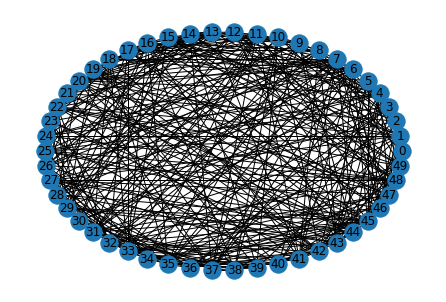

In [171]:
# получаем граф
edges_1, edge_count_1, node_count_1, weights_1 = get_graph('data/gc_50_3')

# чертим исходный граф
draw_graph(edges_1, node_count_1)

Значение целевой функции flipcoin_maxcut:  224.0
Разделение вершин для flipcoin_maxcut:  [1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1]


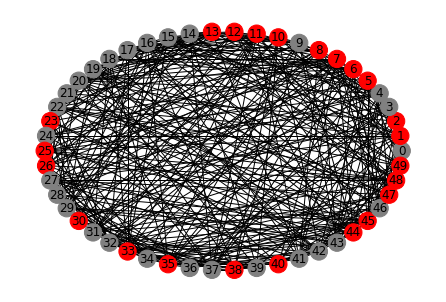

In [172]:
flipcoin_obj_1, flipcoin_nodes_1 = flipcoin_maxcut(edge_count_1, node_count_1, weights_1)
print('Значение целевой функции flipcoin_maxcut: ', flipcoin_obj_1)
print('Разделение вершин для flipcoin_maxcut: ', flipcoin_nodes_1)

draw_coloured_graph(edges_1, node_count_1, flipcoin_nodes_1)

Значение RELAX, посчитанное пакетным методом:  244.79643419375674
Значение RELAX, посчитанное нашим алгоритмом:  244.79415372674097
Значение MAXCUT:  237.0
Разделение вершин для MAXCUT:  [-1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1.  1.  1.
  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1. -1.
 -1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.]


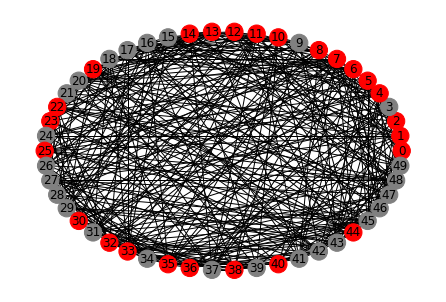

In [173]:
cvx_obj_1, relax_obj_1, maxcut_obj_1, maxcut_nodes_1 = sdp_maxcut(edge_count_1, node_count_1, weights_1, epsilon = 0.01)
print('Значение RELAX, посчитанное пакетным методом: ', cvx_obj_1)
print('Значение RELAX, посчитанное нашим алгоритмом: ', relax_obj_1)
print('Значение MAXCUT: ', maxcut_obj_1)
print('Разделение вершин для MAXCUT: ', maxcut_nodes_1)

draw_coloured_graph(edges_1, node_count_1, maxcut_nodes_1)